## commands for training models and generating saved models (for analysing step)
Appendix:

"For p(z) = N (z; 0, diag(σ)), experiments were run with 

a batch size of 64 and for 20 epochs. For p(z) = 􏰐d STUDENT-T(zd; ν), 

experiments were run with a batch size of 256 and for 40 epochs"

### T-Student's with different degrees of freedom
```
# here batch size and nb epochs different; choose anyway 20, otherwise too much time
DF=2; python main.py --cuda-dev=4 --name dsprites_beta_1_pz_st_$DF --model dsprites \
    --skip-test --epochs 20 --lr 1e-4 --batch-size 256 --latent-dim 10 --beta 1. --prior StudentT --df $DF
DF=5; python main.py --cuda-dev=4 --name dsprites_beta_1_pz_st_$DF --model dsprites \
    --skip-test --epochs 20 --lr 1e-4 --batch-size 256 --latent-dim 10 --beta 1. --prior StudentT --df $DF
DF=9; python main.py --cuda-dev=2 --name dsprites_beta_1_pz_st_$DF --model dsprites \
    --skip-test --epochs 20 --lr 1e-4 --batch-size 256 --latent-dim 10 --beta 1. --prior StudentT --df $DF
DF=12; python main.py --cuda-dev=2 --name dsprites_beta_1_pz_st_$DF --model dsprites \
    --skip-test --epochs 20 --lr 1e-4 --batch-size 256 --latent-dim 10 --beta 1. --prior StudentT --df $DF
DF=9999; python main.py --cuda-dev=6 --name dsprites_beta_1_pz_st_$DF --model dsprites \
    --skip-test --epochs 20 --lr 1e-4 --batch-size 256 --latent-dim 10 --beta 1. --prior StudentT --df $DF

```

### Isotropic gaussian or anistropic gaussian with learned or fixed PCA

```

BETA=1 python main.py --cuda-dev=8 --name dsprites_beta_$BETA\_pz_norm_iso --model dsprites \
    --skip-test --epochs 20 --lr 1e-4 --batch-size 64 --latent-dim 10 --beta $BETA --prior-variance iso
BETA=1 python main.py --cuda-dev=8 --name dsprites_beta_$BETA\_pz_norm_pca --model dsprites \
    --skip-test --epochs 20 --lr 1e-4 --batch-size 64 --latent-dim 10 --beta $BETA --prior-variance pca
BETA=1 python main.py --cuda-dev=8 --name dsprites_beta_$BETA\_pz_norm_pca_learn --model dsprites \
    --skip-test --epochs 20 --lr 1e-4 --batch-size 64 --latent-dim 10 --beta $BETA --prior-variance pca \
    --learn-prior-variance

# --- done

BETA=2; python main.py --cuda-dev=6 --name dsprites_beta_$BETA\_pz_norm_iso --model dsprites \
    --skip-test --epochs 20 --lr 1e-4 --batch-size 64 --latent-dim 10 --beta $BETA --prior-variance iso
BETA=2; python main.py --cuda-dev=7 --name dsprites_beta_$BETA\_pz_norm_pca --model dsprites \
    --skip-test --epochs 20 --lr 1e-4 --batch-size 64 --latent-dim 10 --beta $BETA --prior-variance pca
BETA=2; python main.py --cuda-dev=8 --name dsprites_beta_$BETA\_pz_norm_pca_learn --model dsprites \
    --skip-test --epochs 20 --lr 1e-4 --batch-size 64 --latent-dim 10 --beta $BETA --prior-variance pca \
    --learn-prior-variance

# --- done

BETA=4; python main.py --cuda-dev=9 --name dsprites_beta_$BETA\_pz_norm_iso --model dsprites \
    --skip-test --epochs 20 --lr 1e-4 --batch-size 64 --latent-dim 10 --beta $BETA --prior-variance iso
BETA=4; python main.py --cuda-dev=6 --name dsprites_beta_$BETA\_pz_norm_pca --model dsprites \
    --skip-test --epochs 20 --lr 1e-4 --batch-size 64 --latent-dim 10 --beta $BETA --prior-variance pca
BETA=4; python main.py --cuda-dev=7 --name dsprites_beta_$BETA\_pz_norm_pca_learn --model dsprites \
    --skip-test --epochs 20 --lr 1e-4 --batch-size 64 --latent-dim 10 --beta $BETA --prior-variance pca \
    --learn-prior-variance

# --- done

BETA=8; python main.py --cuda-dev=7 --name dsprites_beta_$BETA\_pz_norm_iso --model dsprites \
    --skip-test --epochs 20 --lr 1e-4 --batch-size 64 --latent-dim 10 --beta $BETA --prior-variance iso
BETA=8; python main.py --cuda-dev=8 --name dsprites_beta_$BETA\_pz_norm_pca --model dsprites \
    --skip-test --epochs 20 --lr 1e-4 --batch-size 64 --latent-dim 10 --beta $BETA --prior-variance pca
BETA=8; python main.py --cuda-dev=6 --name dsprites_beta_$BETA\_pz_norm_pca_learn --model dsprites \
    --skip-test --epochs 20 --lr 1e-4 --batch-size 64 --latent-dim 10 --beta $BETA --prior-variance pca \
    --learn-prior-variance

# --- done

BETA=16; python main.py --cuda-dev=8 --name dsprites_beta_$BETA\_pz_norm_iso --model dsprites \
    --skip-test --epochs 20 --lr 1e-4 --batch-size 64 --latent-dim 10 --beta $BETA --prior-variance iso
BETA=16; python main.py --cuda-dev=8 --name dsprites_beta_$BETA\_pz_norm_pca --model dsprites \
    --skip-test --epochs 20 --lr 1e-4 --batch-size 64 --latent-dim 10 --beta $BETA --prior-variance pca
BETA=16; python main.py --cuda-dev=6 --name dsprites_beta_$BETA\_pz_norm_pca_learn --model dsprites \
    --skip-test --epochs 20 --lr 1e-4 --batch-size 64 --latent-dim 10 --beta $BETA --prior-variance pca \
    --learn-prior-variance
```

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import os
os.chdir('src')
import analyse

In [5]:
path_experiments = '../experiments'

In [ ]:
# calculate disentanglement for each experiment
for exp_name in os.listdir(path_experiments):
    print(exp_name)
    sub_dirs = os.listdir('{}/{}'.format(path_experiments, exp_name))
    # for each experiment, made only one run
    assert len(sub_dirs) == 1
    sub_dir = sub_dirs[0]
    path = os.path.join(path_experiments, exp_name, sub_dir)
    result = analyse.run(
        path,
        disentanglement=True
    )

## Results for Isotropic, PCA anisotropic and learned anisoptropic

In [177]:
def reduce_result(result):
    return [result['test_disentanglement'][0], -result['test_recon'][0], result['test_loss'][0]]

In [216]:
results = {}
# calculate disentanglement for each experiment
for exp_name in filter(
    lambda k: 'st' not in k, os.listdir(path_experiments)
):
    sub_dir = os.listdir('{}/{}'.format(path_experiments, exp_name))[0]
    path = os.path.join(path_experiments, exp_name, sub_dir)
    path_result = os.path.join(path, 'losses2.rar')
    exp_type = exp_name.split('_pz_norm_')[1]
    exp_type = exp_type.replace('pca_learn', 'learn')
    beta = int(exp_name.split('_')[2])
    reduced_result = [beta, *reduce_result(torch.load(path_result))]
    if exp_type not in results:
        results[exp_type] = [reduced_result]
    else:
        results[exp_type].append(reduced_result)

In [217]:
results

{'pca': [[2, 0.6293500065803528, 36.81873127652539, 74.40439233382543],
  [4, 0.7137500047683716, 54.36469769477844, 108.69641178448995],
  [16, 0.7834500074386597, 121.89378808670574, 218.7743469397227],
  [1, 0.7256999611854553, 25.531763960089947, 51.359320506453514],
  [8, 0.6635000109672546, 80.48822306195895, 161.192526740498]],
 'learn': [[4, 0.8089999556541443, 50.69554929633935, 107.766665557358],
  [2, 0.8659499883651733, 33.50199569943879, 73.59125222629972],
  [16, 0.7354999780654907, 114.4205999341276, 217.70467833810383],
  [1, 0.8400499820709229, 23.69030263606045, 50.89895925521851],
  [8, 0.7256499528884888, 78.46133697099155, 159.63298847807778]],
 'iso': [[2, 0.8127999901771545, 33.948161529335714, 73.17408947613504],
  [4, 0.6886999607086182, 50.133210098081165, 108.22840852075153],
  [16, 0.8083999752998352, 113.28745107187166, 217.61837780078253],
  [8, 0.7337499856948853, 79.42994534472625, 158.89367266363567],
  [1, 0.7054499983787537, 23.542267998887432, 51.283

In [218]:
# sort w.r.t. beta
for k in results:
    results[k] = sorted(results[k], key = lambda x: x[0])

In [219]:
results

{'pca': [[1, 0.7256999611854553, 25.531763960089947, 51.359320506453514],
  [2, 0.6293500065803528, 36.81873127652539, 74.40439233382543],
  [4, 0.7137500047683716, 54.36469769477844, 108.69641178448995],
  [8, 0.6635000109672546, 80.48822306195895, 161.192526740498],
  [16, 0.7834500074386597, 121.89378808670574, 218.7743469397227]],
 'learn': [[1, 0.8400499820709229, 23.69030263606045, 50.89895925521851],
  [2, 0.8659499883651733, 33.50199569943879, 73.59125222629972],
  [4, 0.8089999556541443, 50.69554929633935, 107.766665557358],
  [8, 0.7256499528884888, 78.46133697099155, 159.63298847807778],
  [16, 0.7354999780654907, 114.4205999341276, 217.70467833810383]],
 'iso': [[1, 0.7054499983787537, 23.542267998887432, 51.283004479938086],
  [2, 0.8127999901771545, 33.948161529335714, 73.17408947613504],
  [4, 0.6886999607086182, 50.133210098081165, 108.22840852075153],
  [8, 0.7337499856948853, 79.42994534472625, 158.89367266363567],
  [16, 0.8083999752998352, 113.28745107187166, 217.61

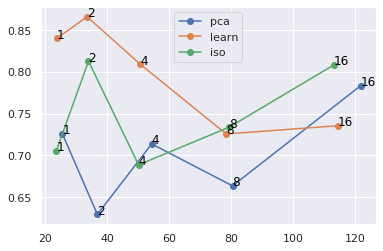

In [220]:
for k in results:
    A = np.array(results[k])
    betas = A[:, 0]
    disentanglement_score = A[:, 1]
    reconstruction_loss = A[:, 2]
    plt.plot(reconstruction_loss, disentanglement_score, label=k, marker='o')
    for b, x, y in zip(betas, reconstruction_loss, disentanglement_score):
        plt.text(x, y, int(b), color="black", fontsize=12)
#     plt.text()
plt.legend(loc='upper center')

## Results for Student's t

In [221]:
results = []
for exp_name in filter(
    lambda k: 'st' in k, os.listdir(path_experiments)
):
    print(exp_name)
    sub_dir = os.listdir('{}/{}'.format(path_experiments, exp_name))[0]
    path = os.path.join(path_experiments, exp_name, sub_dir)
    path_result = os.path.join(path, 'losses2.rar')
    df = int(exp_name.split('_')[-1])
    reduced_result = [df, *reduce_result(torch.load(path_result))]
    results.append(reduced_result)

dsprites_beta_1_pz_st_2
dsprites_beta_1_pz_st_9999
dsprites_beta_1_pz_st_5
dsprites_beta_1_pz_st_12
dsprites_beta_1_pz_st_9


In [222]:
results

[[2, 0.7511000037193298, 23.74357327553961, 50.44029559791088],
 [9999, 0.7664499878883362, 32.73240180148019, 57.958545576201544],
 [5, 0.7141500115394592, 22.506062146524588, 50.0324203375313],
 [12, 0.8029999732971191, 34.51896940867106, 59.646513251463574],
 [9, 0.7371999621391296, 23.619375787509814, 50.93857575323847]]

In [223]:
# sort w.r.t. reconstruction err
results = sorted(results, key = lambda x: x[1])

In [224]:
results

[[5, 0.7141500115394592, 22.506062146524588, 50.0324203375313],
 [9, 0.7371999621391296, 23.619375787509814, 50.93857575323847],
 [2, 0.7511000037193298, 23.74357327553961, 50.44029559791088],
 [9999, 0.7664499878883362, 32.73240180148019, 57.958545576201544],
 [12, 0.8029999732971191, 34.51896940867106, 59.646513251463574]]

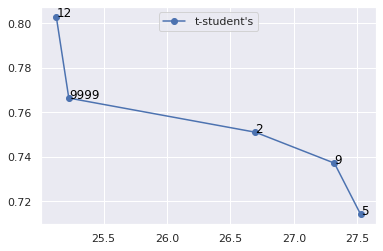

In [225]:
# loss minus recon. loss; 9999 represents inf
A = np.array(results)
dfs = A[:, 0]
disentanglement_score = A[:, 1]
reconstruction_loss = A[:, 3] - A[:, 2]
plt.plot(reconstruction_loss, disentanglement_score, label="t-student's", marker='o')
for df, x, y in zip(dfs, reconstruction_loss, disentanglement_score):
    plt.text(x, y, int(df), color="black", fontsize=12)
#     plt.text()
plt.legend(loc='upper center')

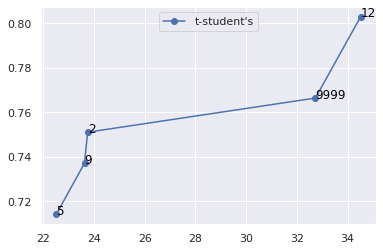

In [226]:
# recon. loss
A = np.array(results)
dfs = A[:, 0]
disentanglement_score = A[:, 1]
reconstruction_loss = A[:, 2]
plt.plot(reconstruction_loss, disentanglement_score, label="t-student's", marker='o')
for df, x, y in zip(dfs, reconstruction_loss, disentanglement_score):
    plt.text(x, y, int(df), color="black", fontsize=12)
#     plt.text()
plt.legend(loc='upper center')